Class -16th June 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('bank_transactions.csv')

In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            20000 non-null  object 
 1   CustomerID               20000 non-null  object 
 2   CustomerDOB              19928 non-null  object 
 3   CustGender               19989 non-null  object 
 4   CustLocation             19999 non-null  object 
 5   CustAccountBalance       19973 non-null  float64
 6   TransactionDate          20000 non-null  object 
 7   TransactionTime          20000 non-null  int64  
 8   TransactionAmount (INR)  20000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [5]:
df.dropna(inplace= True)

In [6]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [35]:
num_feat=df[['CustAccountBalance','TransactionAmount (INR)']]


In [36]:
num_feat.head()

,CustAccountBalance,TransactionAmount (INR)
0,17819.05,25.0
1,2270.69,27999.0
2,17874.44,459.0
3,866503.21,2060.0
4,6714.43,1762.5


In [37]:
scaler=StandardScaler()


In [38]:
scaled_feat= scaler.fit_transform(num_feat)

In [39]:
scaled_feat

array([[-1.41824169e-01, -2.34306824e-01],
       [-1.63397398e-01,  3.65358538e+00],
       [-1.41747316e-01, -1.73988484e-01],
       ...,
       [-2.64242290e-03,  2.34758601e-01],
       [-1.48196907e-01, -1.68290208e-01],
       [ 3.62880099e-01, -2.00256148e-01]])

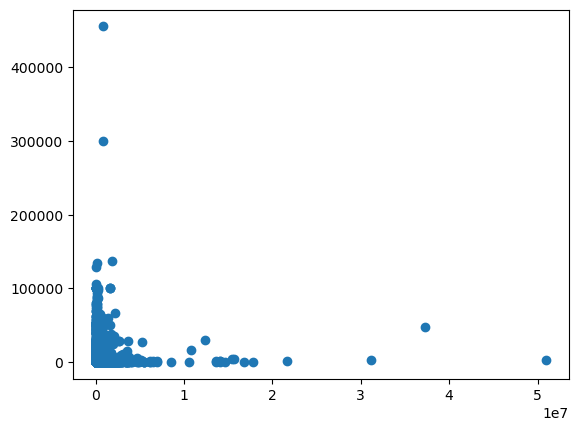

In [40]:
plt.scatter(num_feat['CustAccountBalance'],y =num_feat['TransactionAmount (INR)'])

In [23]:
km=KMeans(n_clusters=5,random_state=30)

In [43]:
num_feat['cluster_v1']=km.fit_predict(scaled_feat)

In [44]:
num_feat

,CustAccountBalance,TransactionAmount (INR),cluster_v1
0,17819.05,25.0,0
1,2270.69,27999.0,0
2,17874.44,459.0,0
3,866503.21,2060.0,0
4,6714.43,1762.5,0
...,...,...,...
19995,9961.78,47.0,0
19996,7120.57,300.0,0
19997,118130.78,3400.0,0
19998,13226.06,500.0,0


In [45]:
num_feat['cluster_v1'].value_counts()

cluster_v1
0    19687
1      175
3       22
2        3
4        2
Name: count, dtype: int64

In [47]:
num_feat.head()

,CustAccountBalance,TransactionAmount (INR),cluster_v1
0,17819.05,25.0,0
1,2270.69,27999.0,0
2,17874.44,459.0,0
3,866503.21,2060.0,0
4,6714.43,1762.5,0


Elbow Method

In [56]:
wcss=[]
for i in range(1,11):
    kms =KMeans(n_clusters= i, init='k-means++', random_state=4)
    kms.fit(scaled_feat)
    wcss.append(kms.inertia_)

In [57]:
wcss

[39778.00000000002,
 27870.67843405132,
 16554.83896970768,
 12666.368709125672,
 9973.028815736954,
 6919.73573451384,
 4977.155092954024,
 3999.1784652012952,
 3145.1139916903485,
 2642.3035350808336]

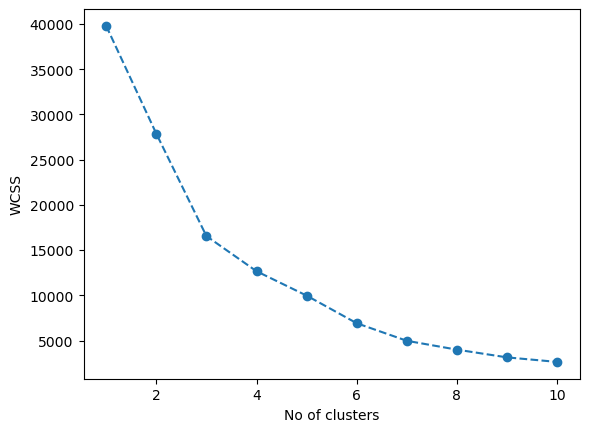

In [61]:
plt.plot(range(1,11),wcss, marker ='o', linestyle='--')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

Create Cluster for -cluster_v2


In [62]:
km=KMeans(n_clusters=3,random_state=30)

In [63]:
num_feat['cluster_v2']=km.fit_predict(scaled_feat)

In [64]:
num_feat

,CustAccountBalance,TransactionAmount (INR),cluster_v1,cluster_v2
0,17819.05,25.0,0,0
1,2270.69,27999.0,0,0
2,17874.44,459.0,0,0
3,866503.21,2060.0,0,0
4,6714.43,1762.5,0,0
...,...,...,...,...
19995,9961.78,47.0,0,0
19996,7120.57,300.0,0,0
19997,118130.78,3400.0,0,0
19998,13226.06,500.0,0,0


In [65]:
num_feat['cluster_v2'].value_counts()

cluster_v2
0    19725
1      147
2       17
Name: count, dtype: int64

In [66]:
num_feat.head()

,CustAccountBalance,TransactionAmount (INR),cluster_v1,cluster_v2
0,17819.05,25.0,0,0
1,2270.69,27999.0,0,0
2,17874.44,459.0,0,0
3,866503.21,2060.0,0,0
4,6714.43,1762.5,0,0


In [67]:
wcss=[]
for i in range(1,11):
    kms =KMeans(n_clusters= i, init='k-means++', random_state=4)
    kms.fit(scaled_feat)
    wcss.append(kms.inertia_)

In [68]:
wcss

[39778.00000000002,
 27870.67843405132,
 16554.83896970768,
 12666.368709125672,
 9973.028815736954,
 6919.73573451384,
 4977.155092954024,
 3999.1784652012952,
 3145.1139916903485,
 2642.3035350808336]

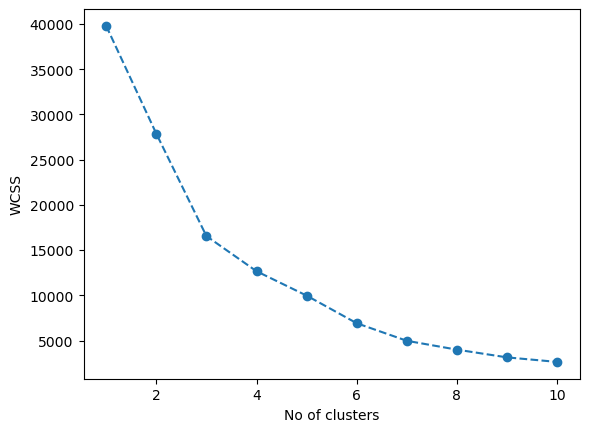

In [69]:
plt.plot(range(1,11),wcss, marker ='o', linestyle='--')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

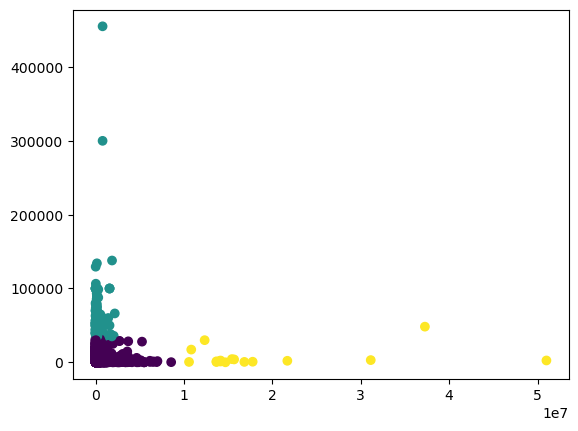

In [71]:
plt.scatter(x= num_feat['CustAccountBalance'],
            y= num_feat['TransactionAmount (INR)'],
            c=num_feat['cluster_v2'])

Cluster formed---different colour 

.

..

.


.

.

.

Heirarchical ---Agglomerative CLustering 